## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('colorblind')
sns.set_style('whitegrid')

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables = variables.set_index('Variable').join(var_dict)
variables.columns

Index(['Number of unique values', 'Values', 'Explanation'], dtype='object')

In [4]:
variables['Explanation']

Variable
credit_policy        1 if the customer meets the credit underwritin...
purpose                                       The purpose of the loan.
int_rate             The interest rate of the loan (more risky borr...
installment          The monthly installments owed by the borrower ...
log_annual_inc       The natural log of the self-reported annual in...
dti                  The debt-to-income ratio of the borrower (amou...
fico                            The FICO credit score of the borrower.
days_with_cr_line    The number of days the borrower has had a cred...
revol_bal            The borrower's revolving balance (amount unpai...
revol_util           The borrower's revolving line utilization rate...
inq_last_6mths       The borrower's number of inquiries by creditor...
delinq_2yrs          The number of times the borrower had been 30+ ...
pub_rec              The borrower's number of derogatory public rec...
not_fully_paid           1 if the loan is not fully paid; 0 otherwis

Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


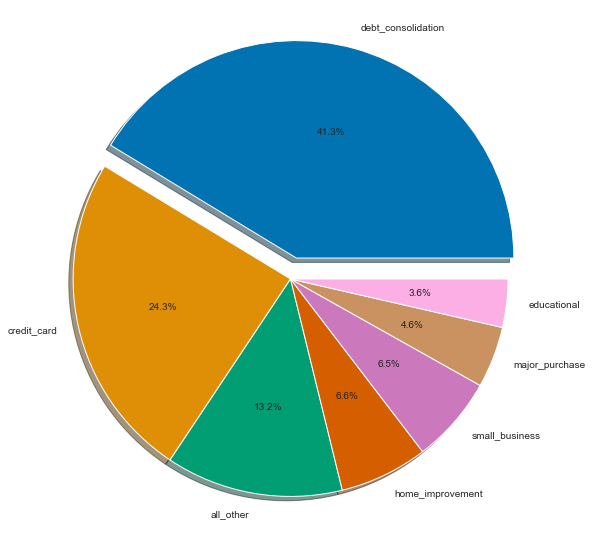

In [6]:
plt.figure(figsize = (10, 10))
explode = (0.1, 0, 0,0, 0, 0, 0)
plt.pie(df['purpose'].value_counts(), labels = df.purpose.unique(), autopct='%1.1f%%', explode = explode, shadow = True)
plt.show()

Debt Consolidation seem to be the primary reason for a loan appeal.

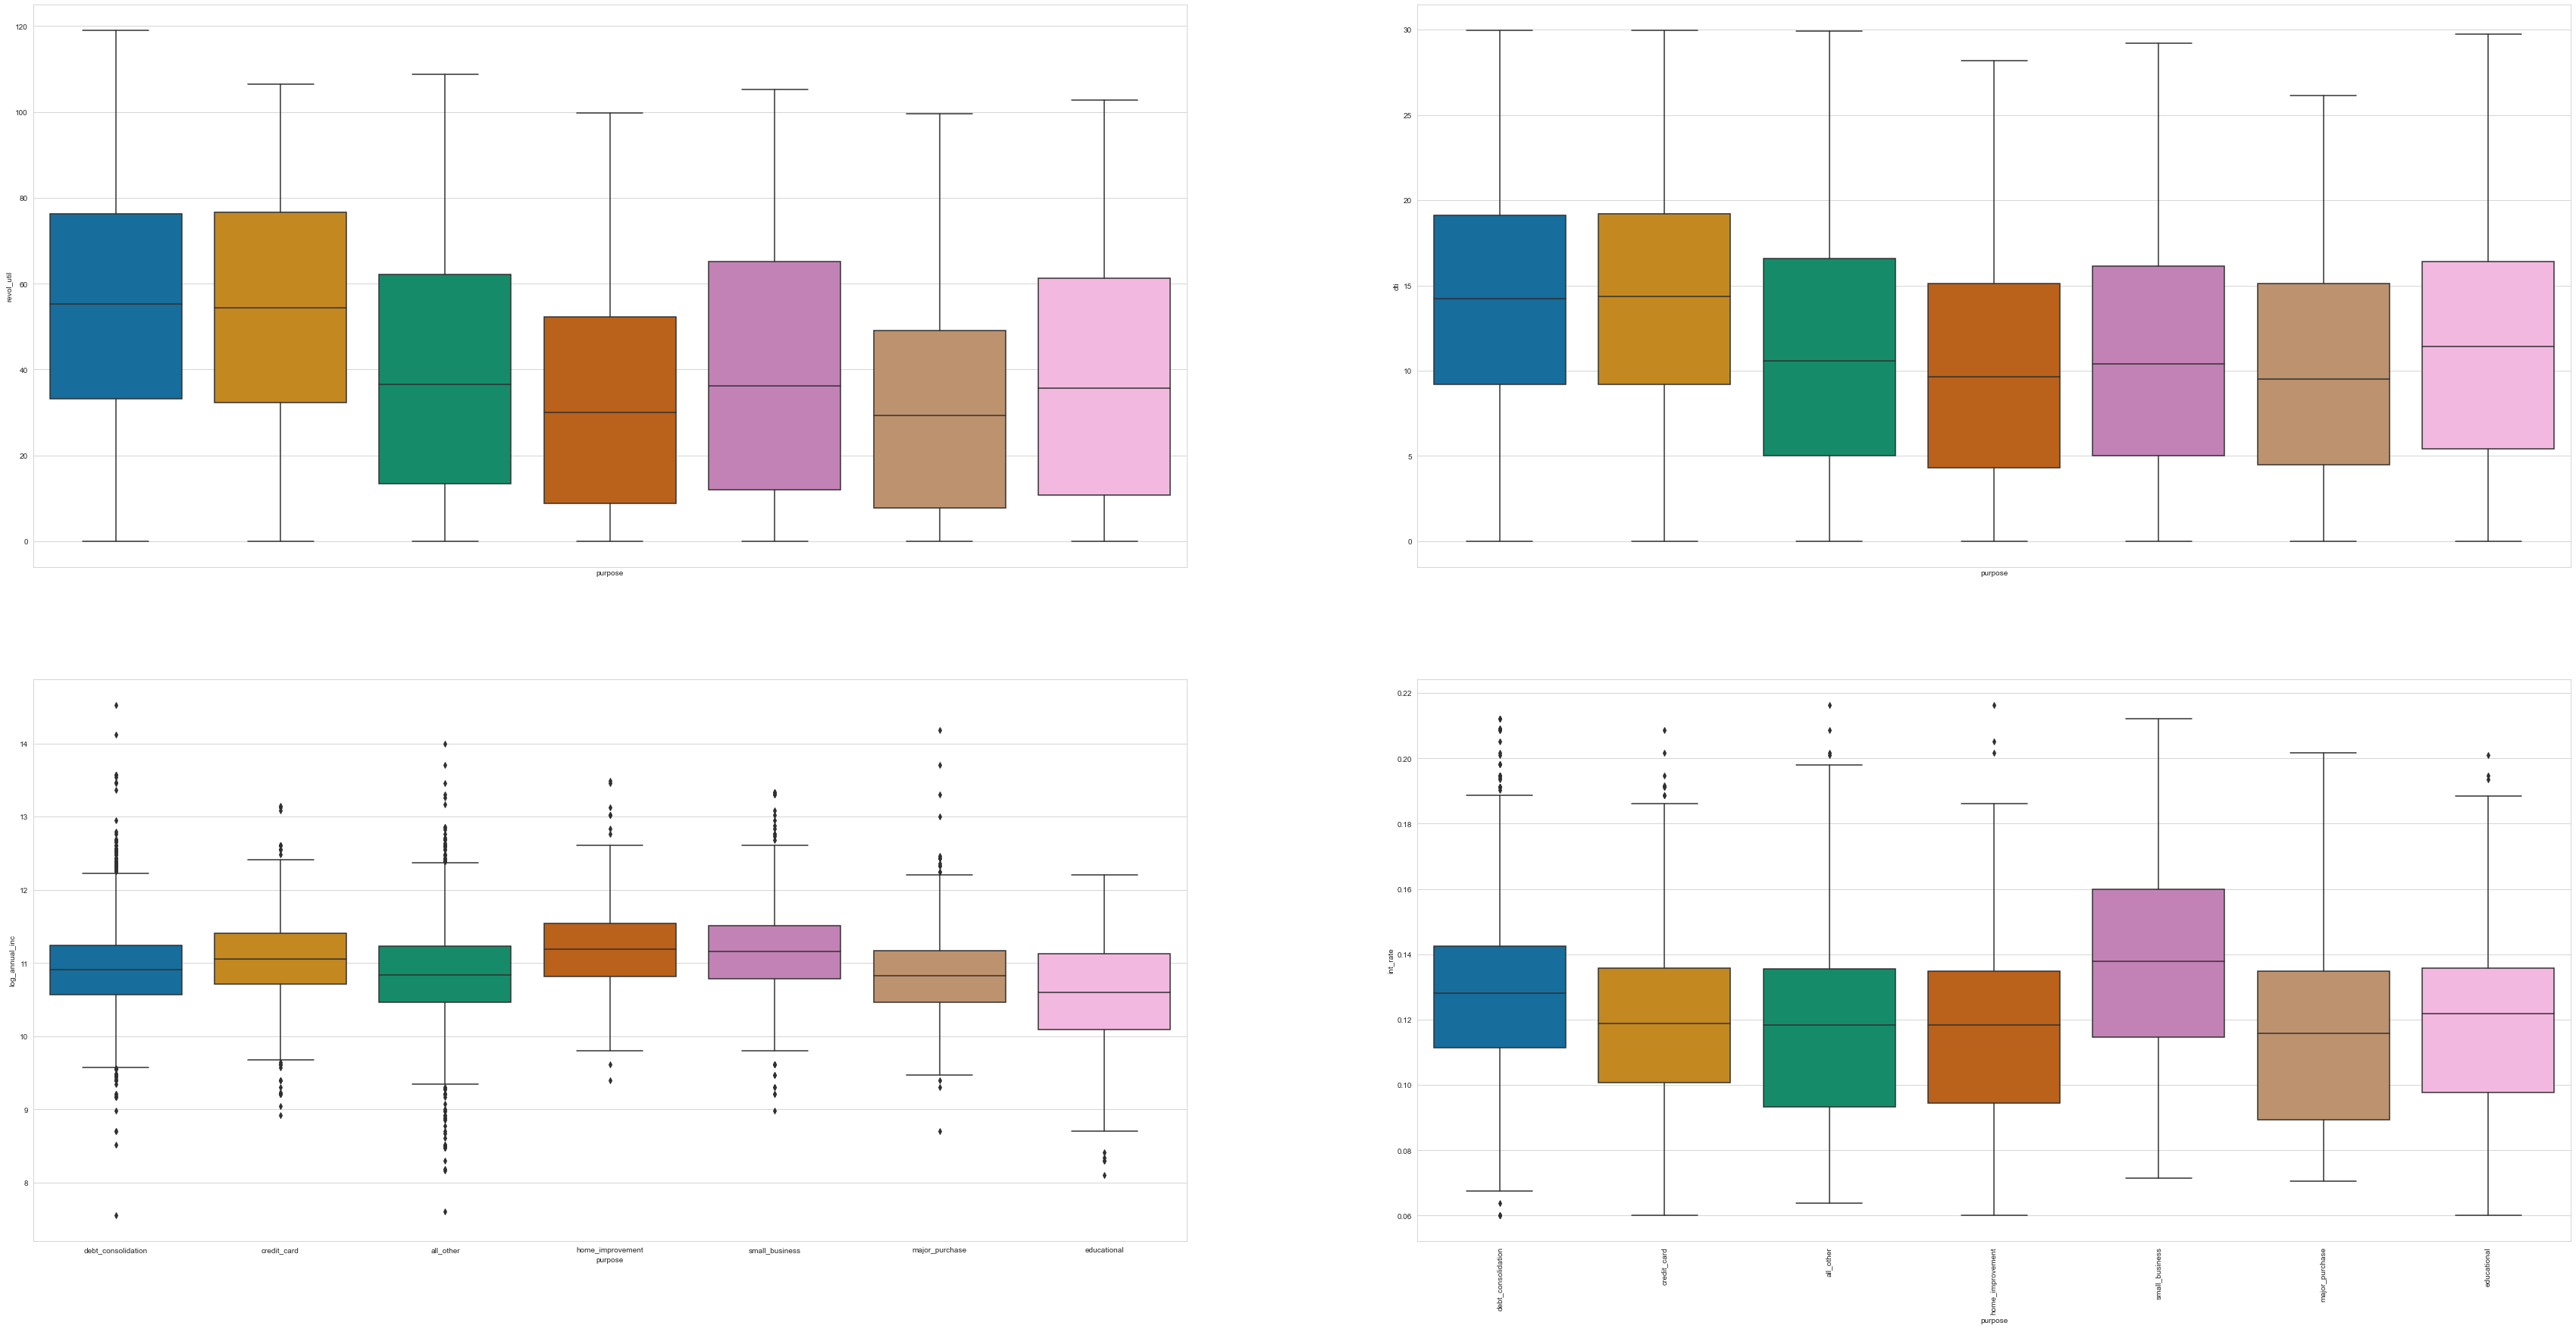

In [7]:
ys = ['revol_util', 'log_annual_inc', 'dti', 'int_rate']
fig, axes = plt.subplots(2,2, figsize = (60, 30), sharex = True)
for i, y in enumerate(ys):
    plt.xticks(rotation = 90)
    sns.boxplot(x = 'purpose', y = y, data = df, ax = axes[i%2, i//2])
plt.show()

The illustrative boxplots shows the difference in distributions of the attributes distinguished according to the purpose of the loans.

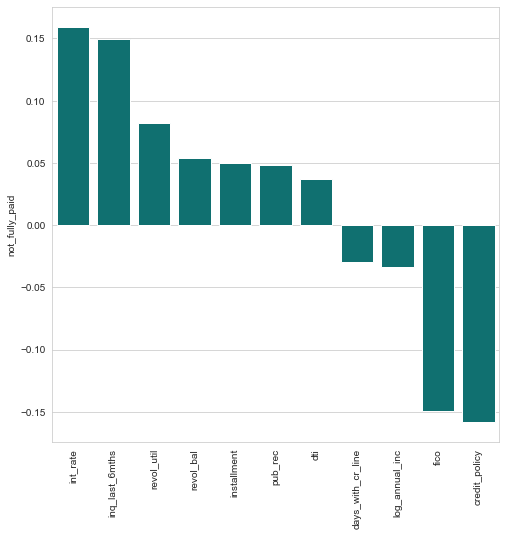

In [8]:
corr_df = df.corr()['not_fully_paid'].sort_values(ascending = False)[1:]
corr_df = corr_df[abs(corr_df) > 0.02]
plt.figure(figsize = (8, 8))
sns.barplot(x = corr_df.index, y = corr_df, color = 'teal')
plt.xticks(rotation = 90)
plt.show()

The two charts show the correlation between the attributes.

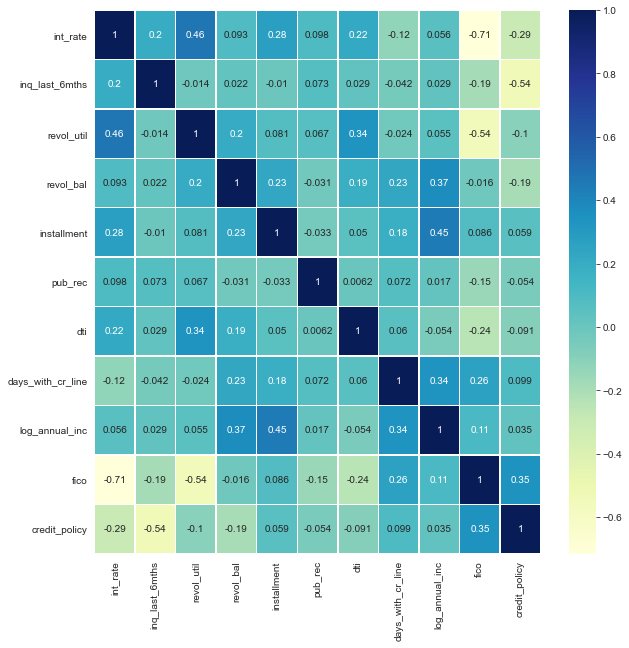

In [9]:
plt.figure(figsize = (10, 10))
cols = corr_df.index
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.4, cmap = 'YlGnBu')
plt.show()

<AxesSubplot:xlabel='log_annual_inc', ylabel='installment'>

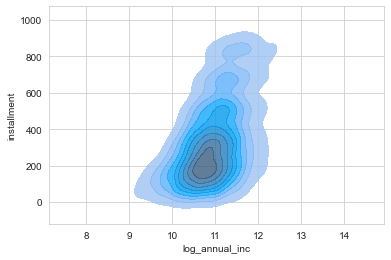

In [10]:
sns.kdeplot(x = 'log_annual_inc', y = 'installment' , data = df, fill = True, palette = 'crest', alpha = 0.8)

<AxesSubplot:xlabel='credit_policy', ylabel='log_annual_inc'>

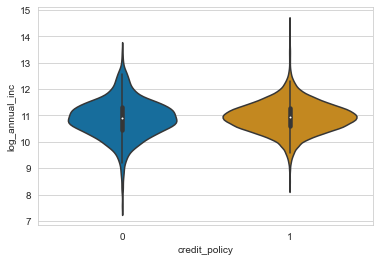

In [11]:
sns.violinplot(x = 'credit_policy', y = 'log_annual_inc', data = df)

The plot shows the tendency of the credit policy to being positively skewed in the case where the annual income of the borrower is higher.

In [12]:
d = df.copy()
d['months_req'] = round(d['revol_bal']/ d['installment'], 2)
d['months_w_crline'] = round(d['days_with_cr_line']/ 30, 2)
d['past_crline'] = d['months_w_crline'] < d['months_req']
print(d['past_crline'].value_counts())
d.head()

False    8551
True     1027
Name: past_crline, dtype: int64


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,months_req,months_w_crline,past_crline
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,34.80,188.00,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,147.33,92.00,True
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,9.57,157.00,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,207.39,90.00,True
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,46.06,135.53,False


The following plot illustrates the correlation of the attributes with the borrower being past the days with credit line too repay the entire loan.

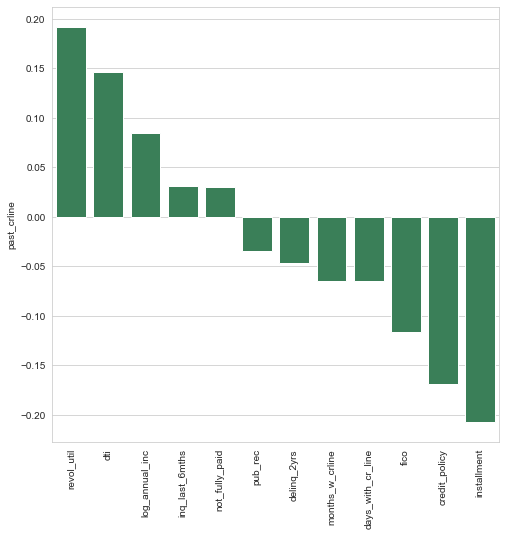

In [13]:
corr_df = d.corr()['past_crline'].sort_values(ascending = False)[1:]
corr_df = corr_df[(abs(corr_df) > 0.03) & (abs(corr_df) < 0.4)]
plt.figure(figsize = (8, 8))
sns.barplot(x = corr_df.index, y = corr_df, color = 'seagreen')
plt.xticks(rotation = 90)
plt.show()

The obvious attributes - revolving balance and months required are removed here to make the plot appear relatively scalable.

<Figure size 576x576 with 0 Axes>

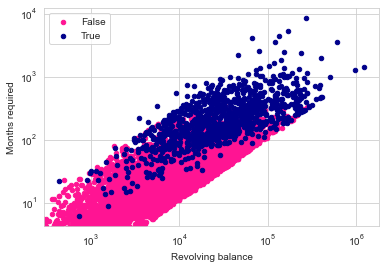

In [56]:
plt.figure(figsize = (8, 8))

colors = {0:'deeppink', 1:'darkblue'}

fig, ax = plt.subplots()
grouped = d.groupby('past_crline')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='revol_bal', y='months_req', label=key, color=colors[key])

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
plt.xlabel('Revolving balance')
plt.ylabel('Months required')
plt.show()

Creating dummy variables for non- integer variables.

In [16]:
df['days_with_cr_line'] = df['days_with_cr_line'].astype('int')
df2 = pd.get_dummies(df['purpose'])
df3 = pd.concat([df2, df], axis = 1)
df3 = df3.drop('purpose', axis = 1)
df3

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,0,0,1,0,0,0,0,1,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,0
1,0,1,0,0,0,0,0,1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,0
2,0,0,1,0,0,0,0,1,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,0
3,0,0,1,0,0,0,0,1,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,0
4,0,1,0,0,0,0,0,1,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0,0,0.1461,344.76,12.180755,10.39,672,10474,215372,82.1,2,0,0,1
9574,1,0,0,0,0,0,0,0,0.1253,257.70,11.141862,0.21,722,4380,184,1.1,5,0,0,1
9575,0,0,1,0,0,0,0,0,0.1071,97.81,10.596635,13.09,687,3450,10036,82.9,8,0,0,1
9576,0,0,0,0,1,0,0,0,0.1600,351.58,10.819778,19.18,692,1800,0,3.2,5,0,0,1


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
Xs = df3.drop('not_fully_paid', axis = 1)
ys = df3['not_fully_paid']
X_train, X_test, y_train, y_test = train_test_split(Xs, ys)

Calculating feature importances in order to find out which of the attributes play the most important roles in making predictions.

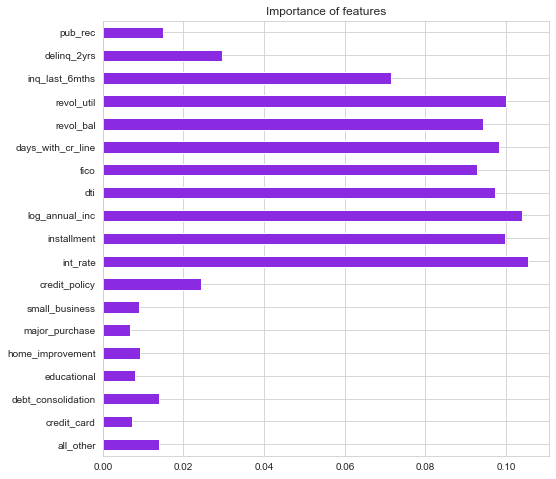

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
plt.figure(figsize = (8,8))
feat_importances.plot(kind='barh', color = 'blueviolet')
plt.title('Importance of features')
plt.show()

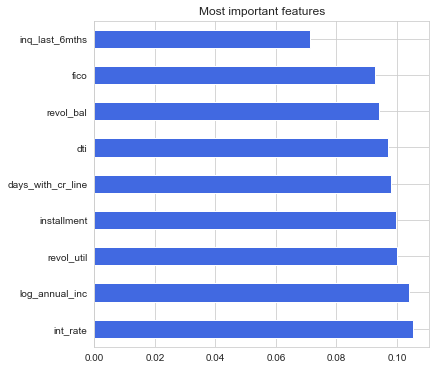

In [20]:
plt.figure(figsize = (6,6))
feat_importances.nlargest(9).plot(kind='barh', color = 'royalblue')
plt.title('Most important features')
plt.show()

Based on plot above, we can select the features which will be most important for our prediction model and remove the ones that have relatively less importance.

In [21]:
less_imp = feat_importances.nsmallest(10)
X_train = X_train.drop([column for column in less_imp.index], axis = 1)
X_train.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths
5957,0.0894,95.32,10.645425,10.29,717,2220,6349,31.6,0
3716,0.1411,855.73,11.407565,11.67,707,4109,17958,55.3,0
8395,0.1039,649.02,11.512925,2.94,727,3300,5207,5.2,8
4512,0.1496,86.62,10.985293,9.66,662,5999,19487,86.6,3
5658,0.1322,507.01,10.463103,17.93,697,4320,12361,57.2,0


We now move on to hyperparameter tuning for prediction models.

In [22]:
steps1 = [('scaler',  StandardScaler()), ('svm', SVC())]
pipeline1 = Pipeline(steps1)
parameters1 = {'svm__C': np.arange(1,5), 'svm__degree': np.arange(1,10)}

In [23]:
#cv1 = GridSearchCV(pipeline1, param_grid = parameters1)
#cv1.fit(X_train, y_train)

#print(cv1.best_params_)
#print(cv1.best_estimator_)

In [24]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
dt = DecisionTreeClassifier(random_state=42, criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

<Figure size 1800x1440 with 0 Axes>

In [25]:
params = {
    'max_depth': np.arange(1, 30),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
#print(score_df.nlargest(5,"mean_test_score"))
print(grid_search.best_estimator_)

Fitting 4 folds for each of 290 candidates, totalling 1160 fits
DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=42)


In [26]:
models = [('lr', LogisticRegression(C= 100)), ('svm', SVC(C = 1, degree = 1)), 
          ('dtc', DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, random_state=42))]

In [27]:
X_test = X_test.drop([column for column in less_imp.index], axis = 1)

In [28]:
def fit_and_score(model, X_train, y_train):
    """ Function to print out the relevant classification metrics"""
    
    steps = [model]
    pipeline = Pipeline(steps)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("======================================================\n")

In [29]:
for model in models:
    print(model[1] ,'\n')
    print(fit_and_score(model, X_train, y_train))

LogisticRegression(C=100) 

Confusion Matrix:
 [[1985    8]
 [ 395    7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1993
           1       0.47      0.02      0.03       402

    accuracy                           0.83      2395
   macro avg       0.65      0.51      0.47      2395
weighted avg       0.77      0.83      0.76      2395


None
SVC(C=1, degree=1) 

Confusion Matrix:
 [[1993    0]
 [ 402    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1993
           1       0.00      0.00      0.00       402

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.69      0.83      0.76      2395


None
DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, random_state=42) 

Confusion Matrix:
 [[1993    0]
 [ 402    0]]
Classification Report:
 

Here, we have good-looking models that can predict on the basis of the given attributes if the loans are fully paid or not. 
It can also give you the probability of the loan being paid on the basis of the given attributes.